# A/B Testing Assignment

In [113]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

### Import the [Absenteeism at Work data set](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv). 

**Note:** The the delimiter of the file is a semi-colon (;), so you will need to set `sep=';`.

In [114]:
df_absentee = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

df_absentee.info()

df_absentee.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


## Confidence Intervals

Suppose this company is analyzing the health of its employees and is specifically interested in their Body Mass Index (BMI). Generate a 95% confidence interval of the mean for that field.

In [115]:
ci_lower, ci_upper = st.t.interval(0.95, len(df_absentee['Body mass index'])-1, loc=df_absentee['Body mass index'].mean(), scale=stats.sem(df_absentee['Body mass index']))

ci_lower, ci_upper

(26.367754917159168, 26.986299136894885)

In [116]:
import statsmodels.stats.api as sms

sms.DescrStatsW(df_absentee['Body mass index']).tconfint_mean()

(26.367754917159168, 26.986299136894885)

In [117]:
def get_95_ci(array_1):
  sample_1_n = array_1.shape[0]
  sample_1_mean = array_1.mean()
  sample_1_var = array_1.var()
  se_diff = math.sqrt((sample_1_var/sample_1_n))
  ci_lower = sample_1_mean - (1.96*se_diff)
  ci_upper = sample_1_mean + (1.96*se_diff)
  return (ci_lower, ci_upper)

In [118]:
get_95_ci(df_absentee['Body mass index'])

(26.36825576762484, 26.985798286429212)

### Visualizing Confidence Intervals

Generate a sampling distribution of the mean for the Body Mass Index field. Create a histogram to visualize the sampling distribution and add an indicator showing the lower and upper bounds of the confidence interval.

In [143]:
#observations should be the sample size from the data set
def get_mean_samples(data, observations=740, samples=10000, replace=True, label='means'):
  return pd.Series([data.sample(observations, replace=replace).mean() for i in range(samples)])

In [141]:
bmi_mean_samples = get_mean_samples(df_absentee['Body mass index'])

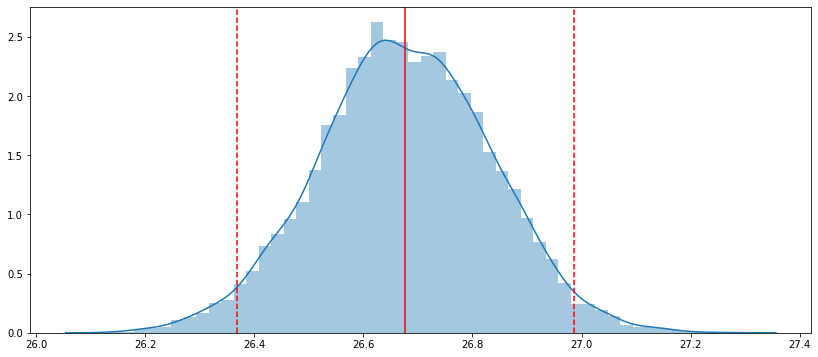

In [142]:
plt.figure(figsize=(14,6))
sns.distplot(bmi_mean_samples)
plt.axvline(x=bmi_mean_samples.mean(), ls='solid', c='r')
plt.axvline(x=ci_min, ls='dashed', c='r')
plt.axvline(x=ci_max, ls='dashed', c='r')
plt.show()

### Confidence Intervals by Group

Suppose we wanted to examine whether there was a difference in the BMIs of employees who drink socially and those that do not. Use the Social Drinker field to split the employees into groups, and then compute the confidence intervals for each group. What insights can you derive from the results?

In [122]:
bmi_social_yes = df_absentee[(df_absentee['Social drinker']==1)]
bmi_social_yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 738
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               420 non-null    int64  
 1   Reason for absence               420 non-null    int64  
 2   Month of absence                 420 non-null    int64  
 3   Day of the week                  420 non-null    int64  
 4   Seasons                          420 non-null    int64  
 5   Transportation expense           420 non-null    int64  
 6   Distance from Residence to Work  420 non-null    int64  
 7   Service time                     420 non-null    int64  
 8   Age                              420 non-null    int64  
 9   Work load Average/day            420 non-null    float64
 10  Hit target                       420 non-null    int64  
 11  Disciplinary failure             420 non-null    int64  
 12  Education             

In [123]:
bmi_social_no = df_absentee[(df_absentee['Social drinker']==0)]
bmi_social_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 9 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               320 non-null    int64  
 1   Reason for absence               320 non-null    int64  
 2   Month of absence                 320 non-null    int64  
 3   Day of the week                  320 non-null    int64  
 4   Seasons                          320 non-null    int64  
 5   Transportation expense           320 non-null    int64  
 6   Distance from Residence to Work  320 non-null    int64  
 7   Service time                     320 non-null    int64  
 8   Age                              320 non-null    int64  
 9   Work load Average/day            320 non-null    float64
 10  Hit target                       320 non-null    int64  
 11  Disciplinary failure             320 non-null    int64  
 12  Education             

In [124]:
yes_bmi = bmi_social_yes['Body mass index']
yes_ci_lower, yes_ci_upper = st.t.interval(0.95, len(yes_bmi)-1, loc=yes_bmi.mean(), scale=stats.sem(yes_bmi))
yes_ci_lower, yes_ci_upper

(27.49904991718434, 28.27714055900614)

In [125]:
no_bmi = bmi_social_no['Body mass index']
no_ci_lower, no_ci_upper = st.t.interval(0.95, len(no_bmi)-1, loc=no_bmi.mean(), scale=stats.sem(no_bmi))
no_ci_lower, no_ci_upper

(24.641171070136533, 25.533828929863464)

The confidence intervals for the two groups do not overlap. So, we can probably assume that the null hypothesis is false. 

### Sampling Distributions for Each Group

Next, let's generate a sampling distribution of the mean for each group and generate a plot containing both of their histograms to see if there is any overlap.

In [126]:
mean_samples_bmi_sd_yes = get_mean_samples(bmi_social_yes['Body mass index'], observations=420)
mean_samples_bmi_sd_no = get_mean_samples(bmi_social_no['Body mass index'], observations=320)

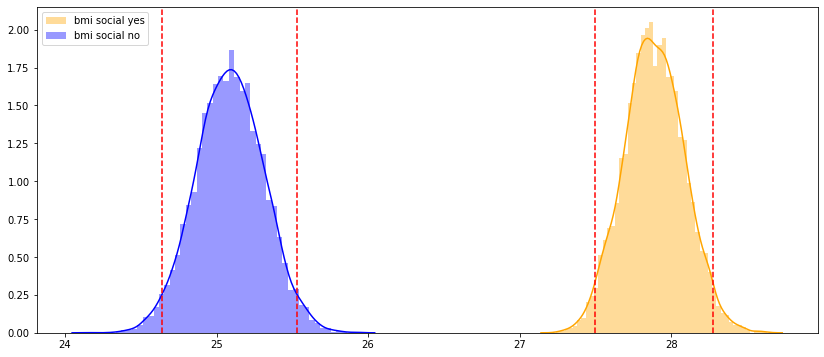

In [127]:
plt.figure(figsize=(14,6))
sns.distplot(mean_samples_bmi_sd_yes, color= 'orange', label='bmi social yes')
sns.distplot(mean_samples_bmi_sd_no, color= 'blue', label='bmi social no')
plt.axvline(x= yes_ci_lower, c='r', ls='dashed')
plt.axvline(x= yes_ci_upper, c='r', ls='dashed')
plt.axvline(x= no_ci_lower, c='r', ls='dashed')
plt.axvline(x= no_ci_upper, c='r', ls='dashed')
plt.legend()
plt.show()

## A/B Testing

Based on our analysis so far, we would like to perform a t-test to determine whether there is a difference in BMI means between our two groups (social drinkers and non-social drinkers). Conduct an independent sample t-test and determine whether the differences between the groups is statistically significant. What is your conclusion?

In [128]:
stats.describe(bmi_social_yes['Body mass index'])

DescribeResult(nobs=420, minmax=(21, 38), mean=27.88809523809524, variance=16.45284123195818, skewness=0.3735851245472099, kurtosis=-0.399599534553416)

In [129]:
stats.describe(bmi_social_no['Body mass index'])

DescribeResult(nobs=320, minmax=(19, 36), mean=25.0875, variance=16.468808777429466, skewness=0.36665152710023935, kurtosis=-0.34978840250660115)

In [130]:
stats.ttest_ind(bmi_social_yes['Body mass index'], bmi_social_no['Body mass index'])

Ttest_indResult(statistic=9.302990833389606, pvalue=1.5203894201359724e-19)

The distributions pass the normality checks, so we can conduct a t-test.
The p-value is much less than 0.05 and therefore we can reject the null hypotheis that the two distributions are the same. With this knowledge, we can now calculate the 95% confidence interval. 

## Confidence Intervals for Group Differences

Generate a 95% confidence interval for the mean difference in BMI between the two groups. Compute the interval using both the traditional method and bootstrapping and compare the results. What conclusions can you draw from the comparison? How would you present a summary of your results to stakeholders?

In [131]:
def get_95_ci(array_1, array_2):
  sample_1_n = array_1.shape[0]
  sample_2_n = array_2.shape[0]
  sample_1_mean = array_1.mean()
  sample_2_mean = array_2.mean()
  sample_1_var = array_1.var()
  sample_2_var = array_2.var()
  mean_diff = sample_2_mean - sample_1_mean
  se_diff = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
  ci_lower = mean_diff - (1.96*se_diff)
  ci_upper = mean_diff + (1.96*se_diff)
  return (ci_lower, ci_upper)

In [132]:
mean_diff_ci_lower, mean_diff_ci_upper = get_95_ci(bmi_social_yes['Body mass index'], bmi_social_no['Body mass index'])
mean_diff_ci_lower, mean_diff_ci_upper

(-3.390677184812264, -2.2105132913782177)

In [133]:
boot = mean_samples_bmi_sd_no - mean_samples_bmi_sd_yes

In [139]:
boot_ci_lower, boot_ci_upper = np.percentile(boot, 2.5), np.percentile(boot, 97.5)
boot_ci_lower, boot_ci_upper

(-3.387235863095238, -2.2149962797619063)

**Message to stakeholders** 

With 740 total samples, 
After splitting the total samples into two groups of whether people socially drink (420 samples) and do not (320 samples), we determined within a 95% confidence interval that people who drink socially on average have 2.21 to 3.39 higher BMI than those who do not drink. 